In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
gammas = [2,4,8,16]
lr = 1.0e-4


for g in gammas:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss, gamma: {g}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=20,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=0.0,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search bert-base-uncased, learning rate 0.0001


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	1.3268	Val Loss:	0.8416	Accuracy:	0.7143	F1:	0.7027
2 / 20: Train Loss:	0.5904	Val Loss:	0.5698	Accuracy:	0.8151	F1:	0.8129
3 / 20: Train Loss:	0.1325	Val Loss:	0.7842	Accuracy:	0.7395	F1:	0.7332
4 / 20: Train Loss:	0.1584	Val Loss:	0.8584	Accuracy:	0.6639	F1:	0.6627
5 / 20: Train Loss:	0.2618	Val Loss:	0.6242	Accuracy:	0.7899	F1:	0.7892
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.87      0.68      0.76        38
oversimplification       0.96      0.69      0.81        36
slothful induction       0.68      0.96      0.80        45

          accuracy                           0.79       119
         macro avg       0.84      0.78      0.79       119
      weighted avg       0.83      0.79      0.79       119

test results:
                    precision    recall  f1-score   support

 misrepresentation       0.64      0.64      0.64     

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	0.5857	Val Loss:	0.8957	Accuracy:	0.6555	F1:	0.6405
2 / 20: Train Loss:	0.2623	Val Loss:	0.6672	Accuracy:	0.7815	F1:	0.7759
3 / 20: Train Loss:	0.0911	Val Loss:	0.5673	Accuracy:	0.8067	F1:	0.8012
4 / 20: Train Loss:	0.0604	Val Loss:	0.5559	Accuracy:	0.7983	F1:	0.7989
5 / 20: Train Loss:	0.0784	Val Loss:	0.6880	Accuracy:	0.6975	F1:	0.6927
6 / 20: Train Loss:	0.0579	Val Loss:	0.5851	Accuracy:	0.7647	F1:	0.7619
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.86      0.63      0.73        38
oversimplification       1.00      0.64      0.78        36
slothful induction       0.65      0.98      0.78        45

          accuracy                           0.76       119
         macro avg       0.83      0.75      0.76       119
      weighted avg       0.82      0.76      0.76       119

test results:
                    precision    recall  f1

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	0.1388	Val Loss:	1.0158	Accuracy:	0.7143	F1:	0.7013
2 / 20: Train Loss:	0.0722	Val Loss:	0.8086	Accuracy:	0.7311	F1:	0.7306
3 / 20: Train Loss:	0.0410	Val Loss:	0.7567	Accuracy:	0.7815	F1:	0.7760
4 / 20: Train Loss:	0.0172	Val Loss:	0.7731	Accuracy:	0.7059	F1:	0.6850
5 / 20: Train Loss:	0.0160	Val Loss:	0.7345	Accuracy:	0.7143	F1:	0.7154
6 / 20: Train Loss:	0.0228	Val Loss:	0.7332	Accuracy:	0.7731	F1:	0.7753
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.89      0.63      0.74        38
oversimplification       1.00      0.69      0.82        36
slothful induction       0.64      0.96      0.77        45

          accuracy                           0.77       119
         macro avg       0.84      0.76      0.78       119
      weighted avg       0.83      0.77      0.77       119

test results:
                    precision    recall  f1

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	0.0092	Val Loss:	1.0530	Accuracy:	0.4706	F1:	0.4433
2 / 20: Train Loss:	0.0045	Val Loss:	1.0264	Accuracy:	0.5714	F1:	0.5754
3 / 20: Train Loss:	0.0033	Val Loss:	0.9768	Accuracy:	0.6891	F1:	0.6988
4 / 20: Train Loss:	0.0026	Val Loss:	0.9425	Accuracy:	0.7143	F1:	0.7036
5 / 20: Train Loss:	0.0034	Val Loss:	0.9866	Accuracy:	0.6807	F1:	0.6797
6 / 20: Train Loss:	0.0022	Val Loss:	0.8931	Accuracy:	0.6387	F1:	0.5935
7 / 20: Train Loss:	0.0014	Val Loss:	0.8476	Accuracy:	0.8235	F1:	0.8224
8 / 20: Train Loss:	0.0004	Val Loss:	0.7685	Accuracy:	0.7899	F1:	0.7888
9 / 20: Train Loss:	0.0002	Val Loss:	0.7593	Accuracy:	0.7479	F1:	0.7412
10 / 20: Train Loss:	0.0001	Val Loss:	0.7360	Accuracy:	0.8319	F1:	0.8292
11 / 20: Train Loss:	0.0000	Val Loss:	0.7235	Accuracy:	0.7815	F1:	0.7773
12 / 20: Train Loss:	0.0000	Val Loss:	0.7150	Accuracy:	0.7899	F1:	0.7880
13 / 20: Train Loss:	0.0000	Val Loss:	0.7074	Accuracy:	0.7815	F1:	0.7792
No improvement for 3 epochs. Stopping early.
best (higgest m

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

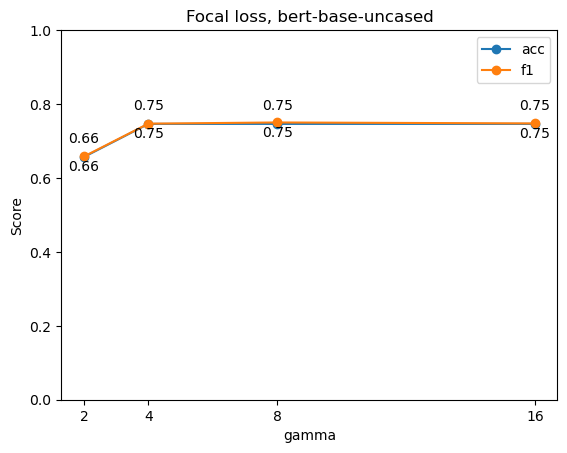

In [9]:
def plot_grid_search(df, title, column):

    # Create the plot
    ax = df.plot(x=column, y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row[column], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row[column], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df[column], [val for val in df[column]], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, {model_checkpoint}', 'g')